# 0) При реализации алгоритма разрешается использовать только библиотеки из requierments.txt

В него входит:
1. jupyter - библиотека для показа ноутбуков
2. numpy - библиотека для вычислений
3. matplotlib - библиотека для визуализации

## Установка 

1. Устанавливаем python3 и virtualenv
2. создаем окружение virtualenv --no-site-packages  lin_prog
3. активируем окружение source activate lin_prog
4. устанавливаем зависимости pip install -r requirements.txt
5. запускаем jupyter и начинаем работать jupyter notebook



# ==========================================================
# Задача на МНК (0.4 балла)

In [4]:
from math import sin
import numpy as np

"""Пусть физический закон описывается зависимостью 
некоторого измеряемого значения y(x, a) 
от времени и координаты x при параметрах a:"""
def y(t,a): 
    return a[2]*sin(t)+a[1]*t +a[0]
    


def get_y (a, σ):
    """Результаты измерений отличаются от истинных значений в силу действия случайной аддитивной помехи 
    (случайность подчиняется нормальному закону распределения N(0, σ))"""
    y_real=np.array([y(i,a) for i in t])
    y_corr=y_real+np.random.normal(0,σ,m)
    return y_real, y_corr

#todo -выбрать параметр
σ=0.5

#перенес наверх было после строчки t=[i*10.0/m for i in range(m)]
"""Для каждого момента времени t сгенерируйте соответствующее 
значение y(t,a) при некоторых параметрах  a_0, a_1, a_2. Для примера: """
a=[10,100,1000]
"""
Дан набор координат t размера m, значения распределены равномерно). Пусть m = 200.
"""
m=200
t=[i*10.0/m for i in range(m)]

#генерация значений. изначальные и с помехами
y_real, y_corr= get_y(a,σ)



In [13]:
len(y_corr)


200

In [72]:

def get_params (y_corr, t, method=0):
    """
    По сгенерированному набору точек y_corr дайте оценку параметрам a
    закона с учетом знания общей формулы тремя различными способами:
    •	method=0 -> сумма квадратов невязок будет минимальна.
    •	method=1 -> сумма абсолютных значений невязок будет минимальна.
    •	method=2 -> максимальное абсолютное значение невязки будет минимально.
    
    #todo - написать ф-ю
    """
    if method == 0:
        A = np.array([np.sin(t), t, np.full(len(t), 1)])
        A = A.transpose()
        b = np.array([y_corr]).transpose()
        A_plus = np.linalg.inv((A.transpose() @ A)) @ A.transpose() 
        ans0 = A_plus @ b
        print(ans0)
        
    return [ans0,0,0]

get_params(y_corr, t, 0)

[[ 1000.10966584]
 [  100.00622645]
 [    9.91234458]]


C:\Users\евгений\Anaconda3\lib\site-packages\numpy\core\numeric.py:294: FutureWarning: in the future, full(200, 1) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


[0, 0, 0]

In [63]:
a = np.array([[1, 0], [0, 1]])
b = np.array([[4, 1], [2, 2]])
np.linalg.inv(b)

array([[ 0.33333333, -0.16666667],
       [-0.33333333,  0.66666667]])

## Задание 1 (0.2 балла)
1.	Постройте в одной координатной плоскости графики у(t, a) и  оценочные значения y(t,a*) для всех 3 методов

2.	Вычислите как отличается каждый из оценочных параметров от своего истинного значения. Как меняется это отличие при изменении σ?
3.	Скорректируйте y_corr[0]  и y_corr[-1] пусть одно из них будет на 50 больше, а другое на 50 меньше. Постройте новые оценочные значения параметров  и соответствующие графики. Какая из оценок получилась более устойчивой к выбросам?

## Задание 2 (0.2 балла)
Возьмем случайную матрицу A  200x80 и случайный вектор b из распределения N(0,1). 

1. Решите переопределенную систему тремя способами, минимизируя l1, l2 и linf нормы вектора b – Ax.
2. Постройте распределение ошибок для каждого решения.
3. Какими свойствами обладают распределения?

# ============================================================
# Задача на Симплекс метод

## 1) На вход Вашему функцию должны приходить:

0. число переменных = n
1. матрица A (n x m) (tsv, вещественные числа)
2. вектор  b  ограничений типа неравнство
4. вектор c функции полезности для задачи max cx 
5. алгоритм выбора входящей переменной (правило Бленда, Лексикографический метод)
6. (не обязательный параметр) стартовую базисную точку

## 2) На выход программа должна выдавать:

### Обязательная часть (0.3 баллов):
0. Ответ и оптимальную точку при положительных компонентах вектора b
1. Количество итераций потребовавшихся для решения задачи
2. при n=2 выдавать процесс решения (draw=True)
3. Напишите программу которая будет отвечать на вопрос оптимально ли приведенное решение, например


### Дополнительная часть  (0.8 балл):
0. Максимально использовать матричные вычисления (0.2 балла)
1. Работать в случае отрицательных чисел в векторе b (0.2 балла)




In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#пример из листочка 1
A=np.array([[1,2],[2,0.5]])
b=np.array([5,8])
c=np.array([5,1])
"""
min -5x - y
x + 2y <= 5
2x +0.5y <= 8
"""


'\nmin -5x - y\nx + 2y <= 5\n2x +0.5y <= 8\n'

In [21]:
def init(A, b, c):
    m = len(b)
    n = len(c)
    #получим строку (xN, xB)
    x_prev = (np.matrix(A).I * np.matrix(b).transpose())
    x = np.row_stack((x_prev, np.matrix(np.zeros(m)).transpose()))
    A = np.hstack((A, np.identity(m)))
    c = np.hstack((c, np.zeros(m)))
    q = c.transpose() * x
    b = np.matrix(b).T
    c = np.matrix(c)
    
init(A,b,c)

[[5]
 [8]]
[[5]
 [8]]


In [74]:
import numpy as np
def solve_lin_prog (A, b, c, method='blend', start_point=None, draw=False):
    """
    Здесь должно быть ваше решение. У всех действий должны быть комментарии. 
    Код должен быть читабельным, хорошо использовать дополнительные функции если это необходимо
    
    A, b, c - матрица, b - вектор ограничений типа <= с - функция полезности, задача максимизации
    method - 'blend', 'lexical'
    start_point - точка
    draw -  true/false рисовать ли ответ, только для 2 переменных
    
    Вывод - вектор на котором достигается максимум, максимальное значение, число итераций
    """
    if method == "blend":
        s
    
    
    x=np.array([4,0])
    result=20
    num_iter=1
    
    #тут рисуем анимацию
    if draw:
        fig, ax= plt.subplots(num_iter+1)
        fig.set_figheight(5*(num_iter+1))
        fig.set_figwidth(5)
        xs=[[0,0],[4,0]]

        for i,a in enumerate(ax):
            a.plot([0,5],[5,0],  color='b')
            a.plot([4,0],[0,16], color='b')
            a.plot([0,0],[0,5], color='b')
            a.plot([0,4],[0,0], color='b')
            a.axis([-1, 17, -1, 17])
            a.set_xlabel('X1')
            a.set_ylabel('X2')
            a.set_title('Iteration %d x=(%.2f, %.2f)' % (i+1,xs[i][0],xs[i][1]))

        ax[0].scatter([0,4,3.66],[5,0,1.33], color='black')
        ax[0].scatter([0],[0], color='red')

        ax[1].scatter([0,0,3.66],[0,5,1.33], color='black')
        ax[1].scatter([4],[0], color='red')


        plt.tight_layout()
        plt.show()
    
    return np.array([4,0]), 20, 1

def is_optimal (A,b,c, x):
    """
    Здесь должна быть реализована проверка оптимальности точки. 
    Алгоритм должен работать для фиксированных n,m за константное время
    """
    return (x==np.array([4,0])).all()

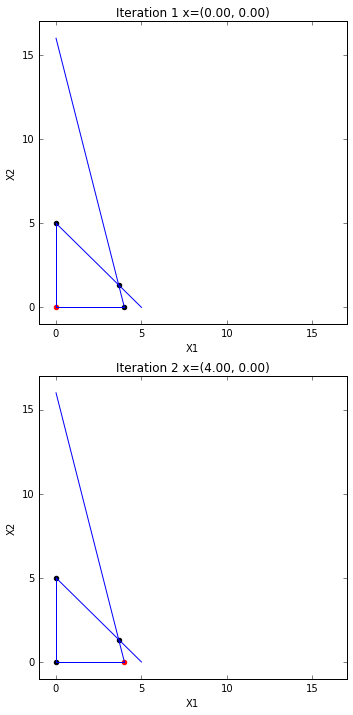

In [75]:
x, best, n_iter = solve_lin_prog(A,b,c, draw=True)

In [5]:
print (u'Точка: ', x)
print (u'Ответ: ', best)
print (u'Число итераций: ', n_iter)

Точка:  [4 0]
Ответ:  20
Число итераций:  1


In [6]:
is_optimal(A,b,c,x)

True

## Бонус +1 Балл
Напишите программу которая для обоих методов из задачи 5 будет использовать 2^n-1 итераций (бонус за каждый метод) и напишите обоснование (итого 0.5 балла за каждый метод)